**1.** Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [1]:
import pandas as pd
#reading the csv file
df = pd.read_csv('/content/drive/MyDrive/datassets/WHR-2024-5CS037.csv')

df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [2]:
df.shape


(143, 9)

In [3]:
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [4]:
print(df['score'].mean())


5.52758041958042


In [5]:
print(df['score'].median())

5.785


In [6]:
print(df['score'].std())

1.1707165099442995


In [7]:
min = df.loc[df['score'].idxmin()]
print(min['Country name'],min['score'])

Afghanistan 1.721


In [8]:
min = df.loc[df['score'].idxmin()]
print("lowest happiness score = ",min['Country name'],min['score'])

lowest happiness score =  Afghanistan 1.721


In [9]:
max = df.loc[df['score'].idxmax()]
print("highest happiness score = ",max['Country name'],max['score'])

highest happiness score =  Finland 7.741


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [10]:
missing = df.isnull().sum()
print(missing)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [11]:
f = df[df['score'] > 7.5]
print(f[['Country name','score']])

  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [14]:
sorting = f.sort_values(by='Log GDP per capita', ascending=False)
print(sorting.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [15]:
sorting =df.sort_values(by='Log GDP per capita', ascending=False)
print(sorting.head(10))

                 Country name  score  Log GDP per capita  Social support  \
7                  Luxembourg  7.122               2.141           1.355   
16                    Ireland  6.838               2.129           1.390   
29                  Singapore  6.523               2.118           1.361   
21       United Arab Emirates  6.733               1.983           1.164   
8                 Switzerland  7.060               1.970           1.425   
6                      Norway  7.302               1.952           1.517   
22              United States  6.725               1.939           1.392   
85  Hong Kong S.A.R. of China  5.316               1.909           1.184   
1                     Denmark  7.583               1.908           1.520   
5                 Netherlands  7.319               1.901           1.462   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
7                     0.708                         0.801       0.146   
16               

• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [16]:
def C_Score(score):
  if(score < 4):
    return 'Low'
  elif(score >= 4 and score <= 6):
    return 'Medium'
  else:
    return 'High'
df['Happiness Category'] = df['score'].apply(C_Score)
df[['Country name','Happiness Category']]

,Country name,Happiness Category
0,Finland,High
1,Denmark,High
2,Iceland,High
3,Sweden,High
4,Israel,High
...,...,...
138,Congo (Kinshasa),Low
139,Sierra Leone,Low
140,Lesotho,Low
141,Lebanon,Low


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

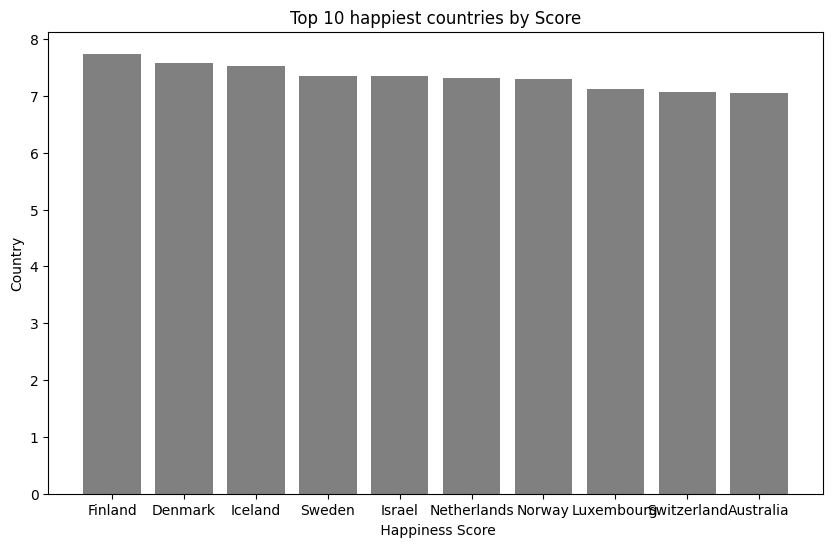

In [17]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sorted_value = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(sorted_value['Country name'],sorted_value['score'], color = 'grey')
plt.xlabel(' Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 happiest countries by Score')
plt.show()


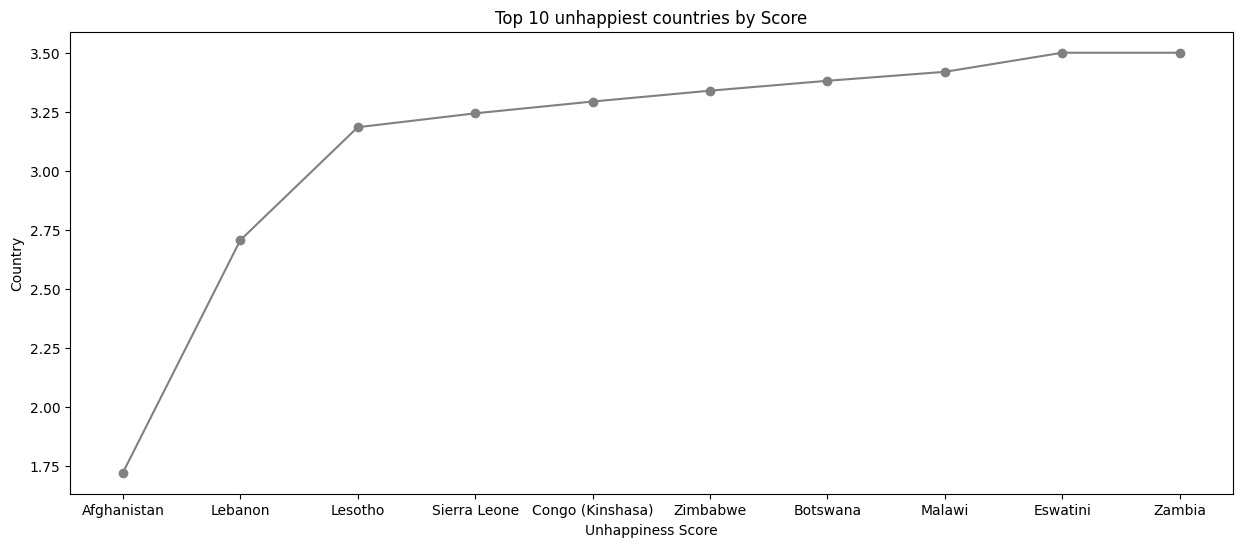

In [18]:
unhappy = df.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(15, 6))
plt.plot(unhappy['Country name'],unhappy['score'],marker='o',linestyle = '-' ,color = 'grey')
plt.xlabel('Unhappiness Score')
plt.ylabel('Country')
plt.title('Top 10 unhappiest countries by Score')
plt.show()

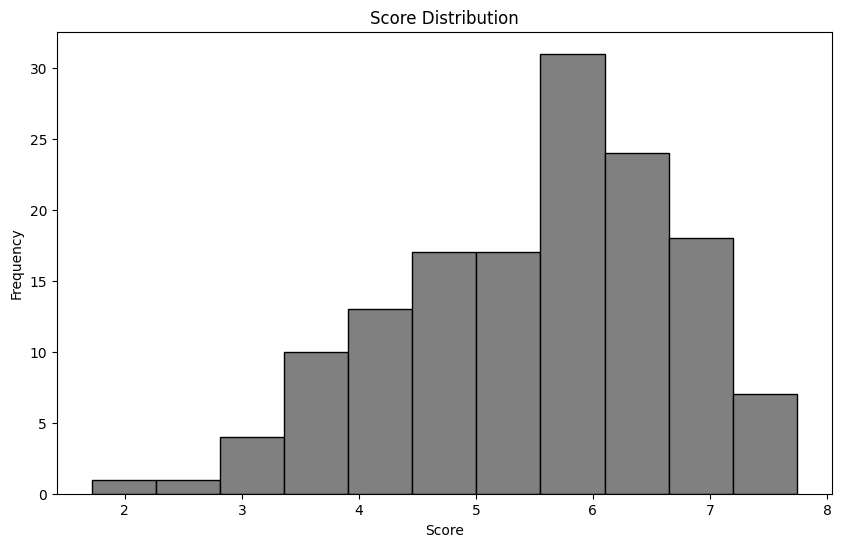

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=11, color='grey', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')
plt.show()

Text(0.5, 1.0, 'Relationship between GDP per Capita and Score')

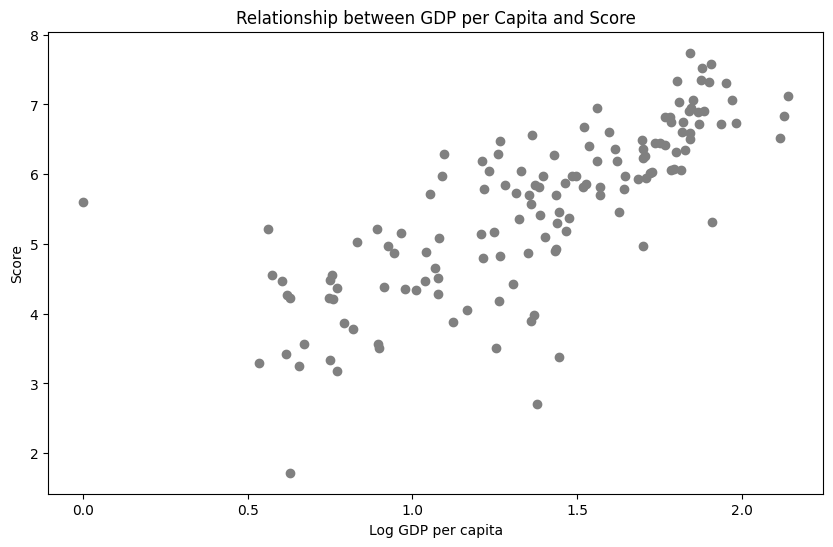

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='grey')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Relationship between GDP per Capita and Score')

Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [22]:
Asia=["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
Asia_df = df[df['Country name'].isin(Asia)]
Asia_df.to_csv('Asia.csv', index=False)
seperate_df = pd.read_csv('/content/Asia.csv')
seperate_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [23]:
seperate_df['Composite']=(0.40*seperate_df['Log GDP per capita'])+(0.60*seperate_df['score']+0.30*seperate_df['Healthy life expectancy'])
South_A =seperate_df.sort_values(by='Country name', ascending=False).head(5)
print(South_A[['Country name','Composite']])

  Country name  Composite
1     Pakistan     3.3181
0        Nepal     3.6137
2        India     3.0239
3   Bangladesh     2.9343
4  Afghanistan     1.3564


Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.


In [24]:
seperate_df['Composite Score']=(0.40*seperate_df['Log GDP per capita']+0.30*seperate_df['Social support']+0.30*seperate_df['Healthy life expectancy'])
South = seperate_df.sort_values(by='Composite Score', ascending=False).head(5)
print(South[['Country name','Composite Score']])

  Country name  Composite Score
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
3   Bangladesh           0.6774
4  Afghanistan           0.3238


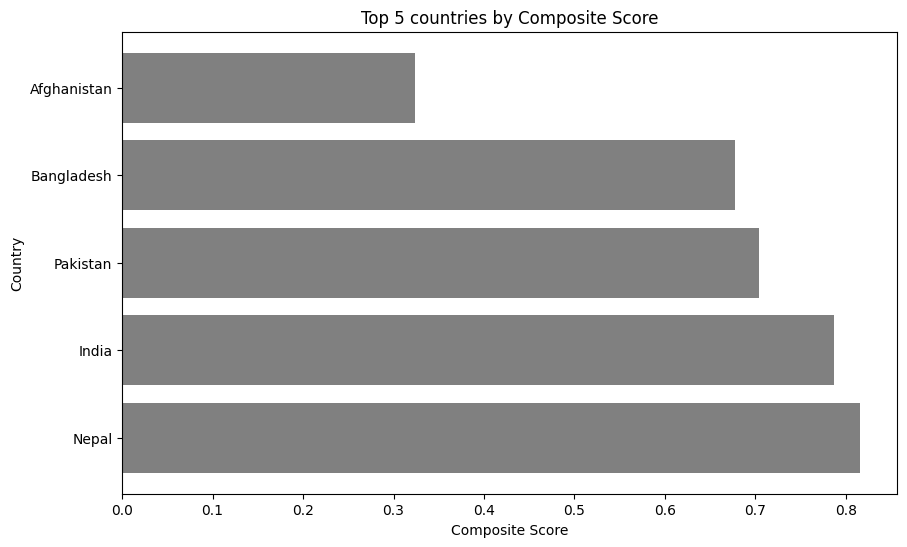

In [25]:
plt.figure(figsize=(10, 6))
plt.barh(South['Country name'], South['Composite Score'], color='grey')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 countries by Composite Score')
plt.show()

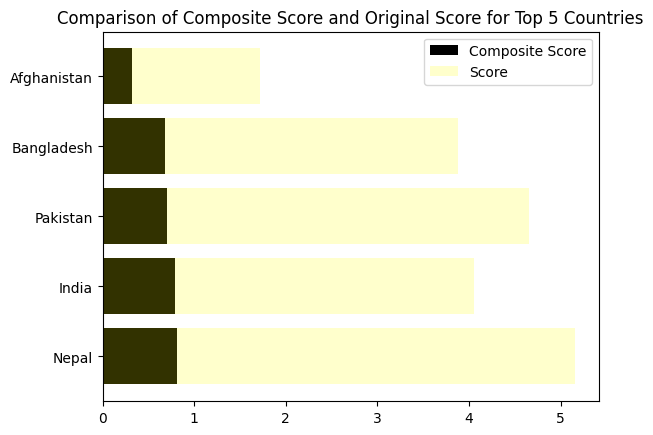

In [43]:
plt.barh(South['Country name'],South['Composite Score'],color = 'black',label = 'Composite Score')
plt.barh(South['Country name'],South['score'],color = 'yellow',alpha=0.2,label = 'Score')
plt.title('Comparison of Composite Score and Original Score for Top 5 Countries')
plt.legend()
plt.show()

Task - 3 - Outlier Detection:

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

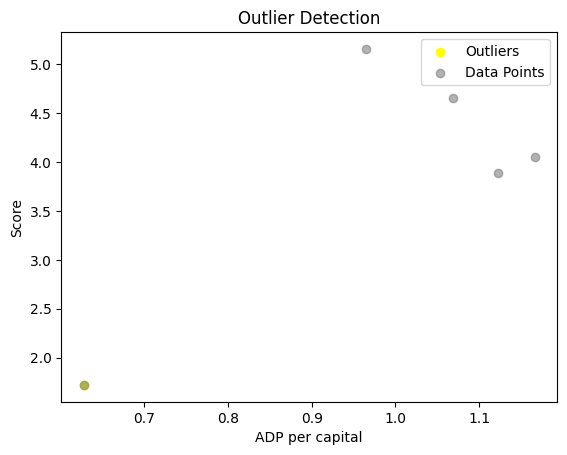

In [27]:
def detection(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  lower_bound = Q1 - 1.5 * (Q3 - Q1)
  upper_bound = Q3 + 1.5 * (Q3 - Q1)
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

score_outliers = detection(seperate_df, 'score')
gdp_outliers = detection(seperate_df, 'Log GDP per capita')
outliers_combined = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

plt.scatter(outliers_combined['Log GDP per capita'], outliers_combined['score'], color='yellow', label='Outliers')
plt.scatter(seperate_df['Log GDP per capita'], seperate_df['score'], alpha = 0.6,color='grey', label='Data Points')
plt.xlabel('ADP per capital')
plt.ylabel('Score')
plt.title('Outlier Detection')
plt.legend()
plt.show()

Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

correlation between Freedom to make life Choices and Score: 0.801497903141921
correlation between Generosity and Score: 0.8773326267276359


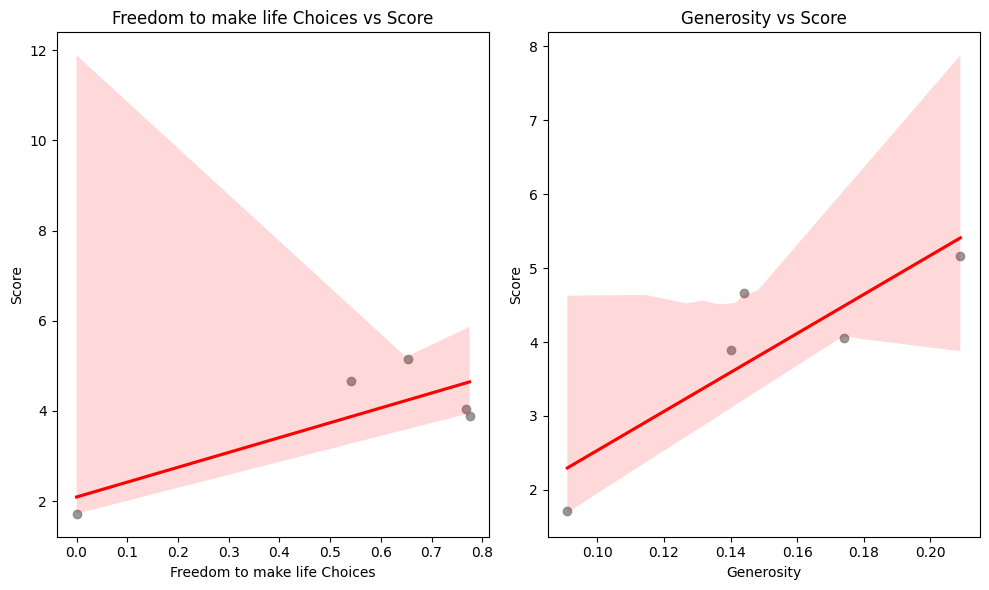

In [28]:
import seaborn as sns
freedom = seperate_df['Freedom to make life choices'].corr(seperate_df['score'])
generosity = seperate_df['Generosity'].corr(seperate_df['score'])

print('correlation between Freedom to make life Choices and Score:',freedom)
print('correlation between Generosity and Score:',generosity)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=seperate_df, scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
plt.title('Freedom to make life Choices vs Score')
plt.xlabel('Freedom to make life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=seperate_df, scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

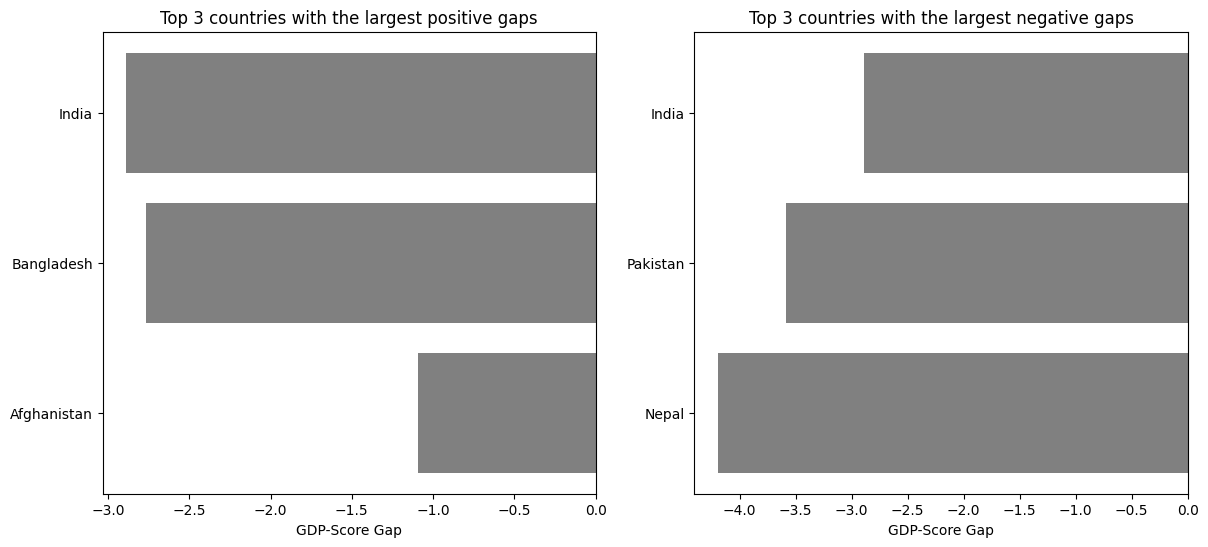

In [29]:
seperate_df['GDP-Score Gap'] = seperate_df['Log GDP per capita'] - seperate_df['score']

sorting_asc = seperate_df.sort_values(by='GDP-Score Gap', ascending=True).head(3)
sorting_desc = seperate_df.sort_values(by='GDP-Score Gap', ascending=False).head(3)

positive_gap = sorting_desc[['Country name', 'GDP-Score Gap']]
negative_gap = sorting_asc[['Country name', 'GDP-Score Gap']]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(positive_gap['Country name'], positive_gap['GDP-Score Gap'], color='grey')
plt.xlabel('GDP-Score Gap')
plt.title('Top 3 countries with the largest positive gaps')

plt.subplot(1, 2, 2)
plt.barh(negative_gap['Country name'], negative_gap['GDP-Score Gap'], color='grey')
plt.xlabel('GDP-Score Gap')
plt.title('Top 3 countries with the largest negative gaps')

plt.show()

3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [31]:
middle_east = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east)]

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

sout_mean = seperate_df['score'].mean()
sout_std = seperate_df['score'].std()

print('South Asia - Mean Happiness Score:',sout_mean)
print('South Asia - Standard Deviation of Happiness Score:',sout_std)

print('\nMiddle East - Mean Happiness Score:',middle_east_mean)
print('Middle East - Standard Deviation of Happiness Score:',middle_east_std)

if sout_mean > middle_east_mean:
  print('\nSouth Asia has higher happiness Scores on average')
else:
  print('\nMiddle East has higher happiness Scores on average')

South Asia - Mean Happiness Score: 3.8952000000000004
South Asia - Standard Deviation of Happiness Score: 1.3160025455902433

Middle East - Mean Happiness Score: 5.412100000000001
Middle East - Standard Deviation of Happiness Score: 1.5662011684327144

Middle East has higher happiness Scores on average



 Top 3 score in south asia
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

 buttom 3 score in south asia
  Country name  score
4  Afghanistan  1.721
3   Bangladesh  3.886
2        India  4.054

 Top 3 score in middle east
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

 buttom 3 score in middle east
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


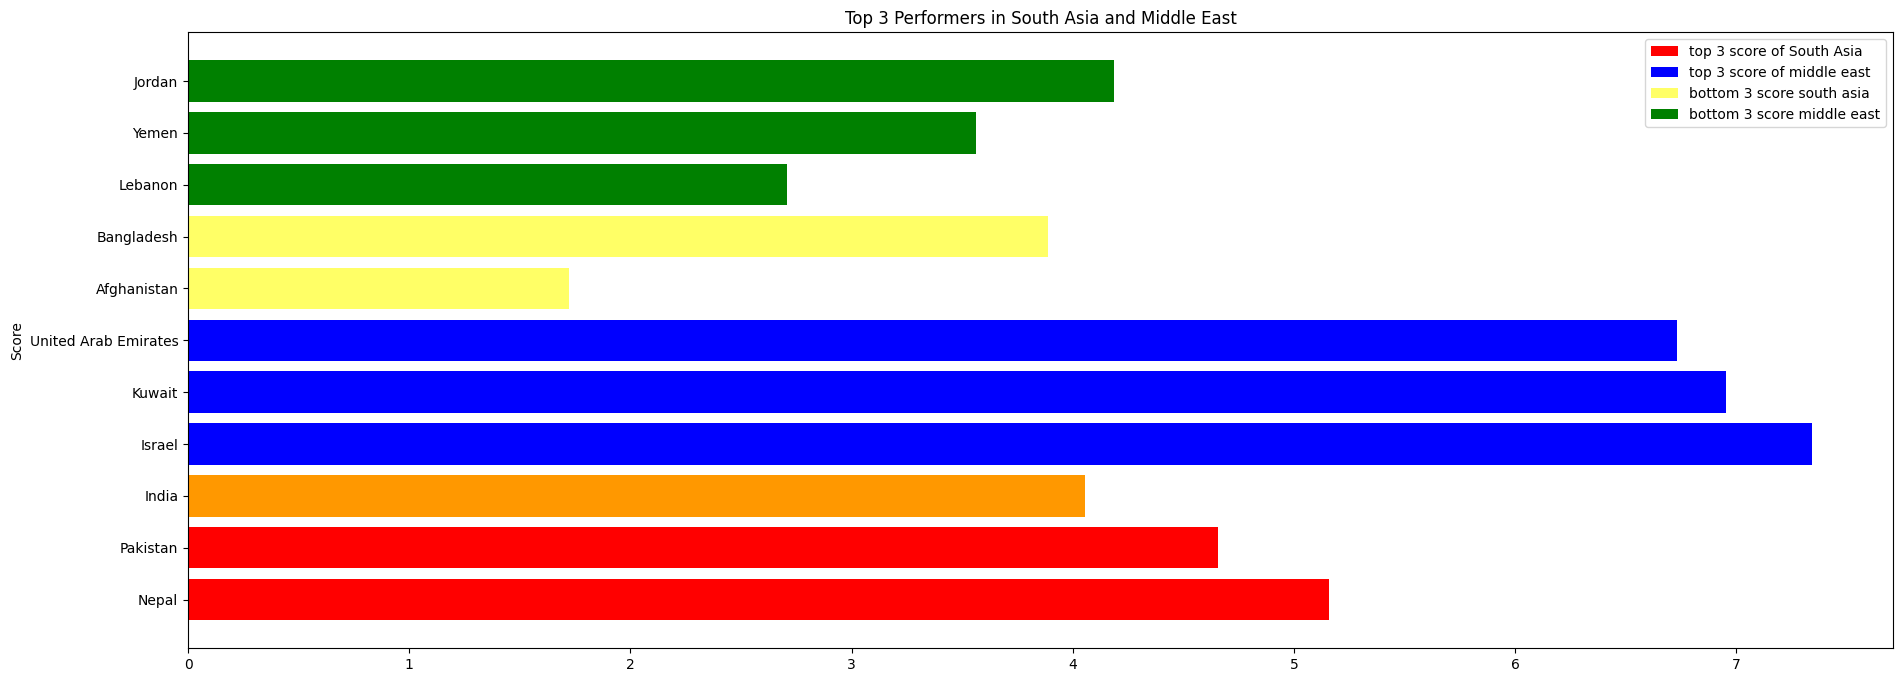

In [32]:
top_3_score_sout = seperate_df.sort_values(by='score',ascending = False).head(3)
top_3_score_middle = middle_east_df.sort_values(by='score',ascending = False).head(3)
bottom_3_score_sout = seperate_df.sort_values(by = 'score',ascending = True).head(3)
bottom_3_score_middle = middle_east_df.sort_values(by = 'score',ascending = True).head(3)

print("\n Top 3 score in south asia")
print(top_3_score_sout[['Country name','score']])
print("\n buttom 3 score in south asia")
print(bottom_3_score_sout[['Country name','score']])
print("\n Top 3 score in middle east")
print(top_3_score_middle[['Country name','score']])
print("\n buttom 3 score in middle east")
print(bottom_3_score_middle[['Country name','score']])
plt.figure(figsize=(22,8))

plt.barh(top_3_score_sout['Country name'],top_3_score_sout['score'],color = 'red',label = 'top 3 score of South Asia')
plt.barh(top_3_score_middle['Country name'],top_3_score_middle['score'],color = 'blue',label = 'top 3 score of middle east')
plt.title('Top 3 Performers in South Asia and Middle East')
plt.ylabel('Score')
plt.legend()

plt.barh(bottom_3_score_sout ['Country name'],bottom_3_score_sout['score'],color = 'yellow',alpha = 0.6,label = 'bottom 3 score south asia')
plt.barh(bottom_3_score_middle['Country name'],bottom_3_score_middle['score'],color = 'green',label = 'bottom 3 score middle east')
plt.title('Top 3 Performers in South Asia and Middle East')
plt.ylabel('Score')
plt.legend()


plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

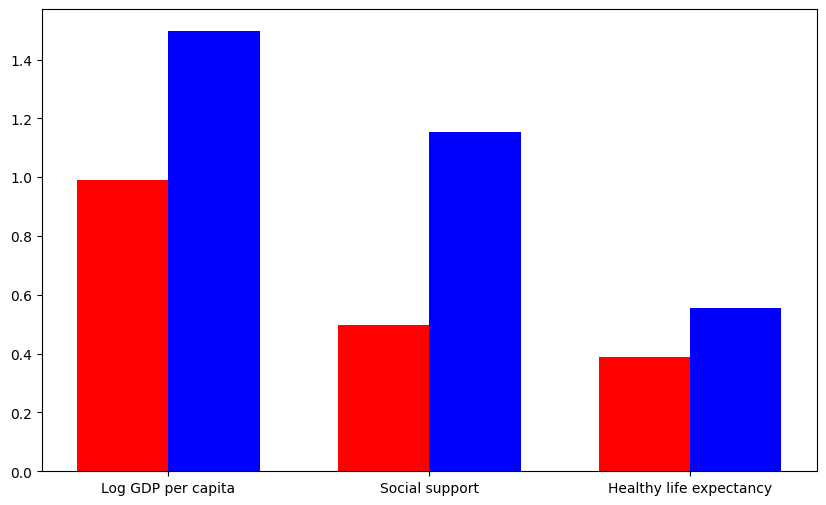

In [38]:
import numpy as np
matrix = ['Log GDP per capita','Social support','Healthy life expectancy']
south_mean = seperate_df[matrix].mean()
middle_mean = middle_east_df[matrix].mean()
indices = np.arange(len(matrix))

bar_width = 0.35

plt.figure(figsize=(10,6))
plt.bar(indices-bar_width/2,south_mean,width = bar_width,label = 'South Asia',color = 'red')
plt.bar(indices+bar_width/2,middle_mean,width = bar_width,label = 'Middle East',color = 'blue')
plt.xticks(indices, matrix)
plt.show()

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [34]:
south_range = seperate_df['score'].max() - seperate_df['score'].min()
south_cv = (seperate_df['score'].std() / seperate_df['score'].mean()) * 100

middle_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_cv = (middle_east_df)['score'].std() / middle_east_df['score'].mean() * 100

print('South Asia - Range:',south_range)
print('Middle East - Range:', middle_range)
print('South Asia - Coefficient of Variation:',south_cv)
print('Middle East - Coefficient of Variation:',middle_cv)

if south_cv > middle_cv:
  print('\nSouth Asia has greater variability in happiness')
else:
  print('\nMiddle East has greater variability in happiness')

South Asia - Range: 3.4370000000000003
Middle East - Range: 4.634
South Asia - Coefficient of Variation: 33.785236845097636
Middle East - Coefficient of Variation: 28.938880812119404

South Asia has greater variability in happiness


Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

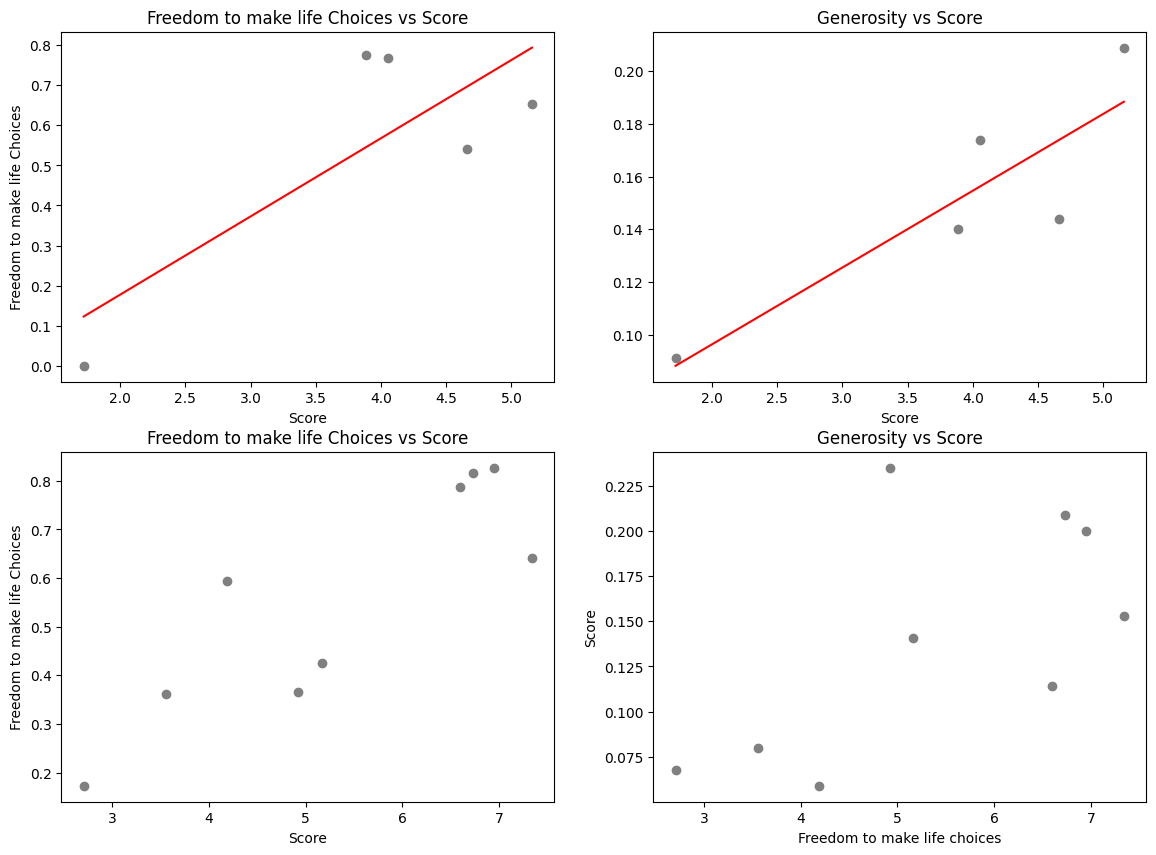

South Asia Correlation
Freedom to make life Choices: 0.801497903141921
Generosity: 0.8773326267276358

Middle East Correlation
Freedom to make life Choices: 0.8632202433827544
Generosity: 0.6275236536964182


In [35]:
South_correlation_freedom = seperate_df['score'].corr(seperate_df['Freedom to make life choices'])
South_correlation_gen = seperate_df['score'].corr(seperate_df['Generosity'])\

South_correlation_freedom_middle = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
South_correlation_gen_middle = middle_east_df['score'].corr(middle_east_df['Generosity'])

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.scatter(seperate_df['score'],seperate_df['Freedom to make life choices'],color = 'grey')
z = np.polyfit(seperate_df['score'],seperate_df['Freedom to make life choices'],1)
p = np.poly1d(z)
plt.plot(seperate_df['score'],p(seperate_df['score']),color = 'red')
plt.title('Freedom to make life Choices vs Score')
plt.xlabel('Score')
plt.ylabel('Freedom to make life Choices')

plt.subplot(2,2,2)
plt.scatter(seperate_df['score'],seperate_df['Generosity'],color = 'grey')
z1 = np.polyfit(seperate_df['score'],seperate_df['Generosity'],1)
p1 = np.poly1d(z1)
plt.plot(seperate_df['score'],p1(seperate_df['score']),color = 'red')
plt.title('Generosity vs Score')
plt.xlabel('Score')

plt.subplot(2,2,3)
plt.scatter(middle_east_df['score'],middle_east_df['Freedom to make life choices'],color = 'grey')
plt.title('Freedom to make life Choices vs Score')
plt.xlabel('Score')
plt.ylabel('Freedom to make life Choices')

plt.subplot(2,2,4)
plt.scatter(middle_east_df['score'],middle_east_df['Generosity'],color = 'grey')
plt.title('Generosity vs Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()

print('South Asia Correlation')
print('Freedom to make life Choices:',South_correlation_freedom)
print('Generosity:',South_correlation_gen)

print('\nMiddle East Correlation')
print('Freedom to make life Choices:',South_correlation_freedom_middle)
print('Generosity:',South_correlation_gen_middle)

Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

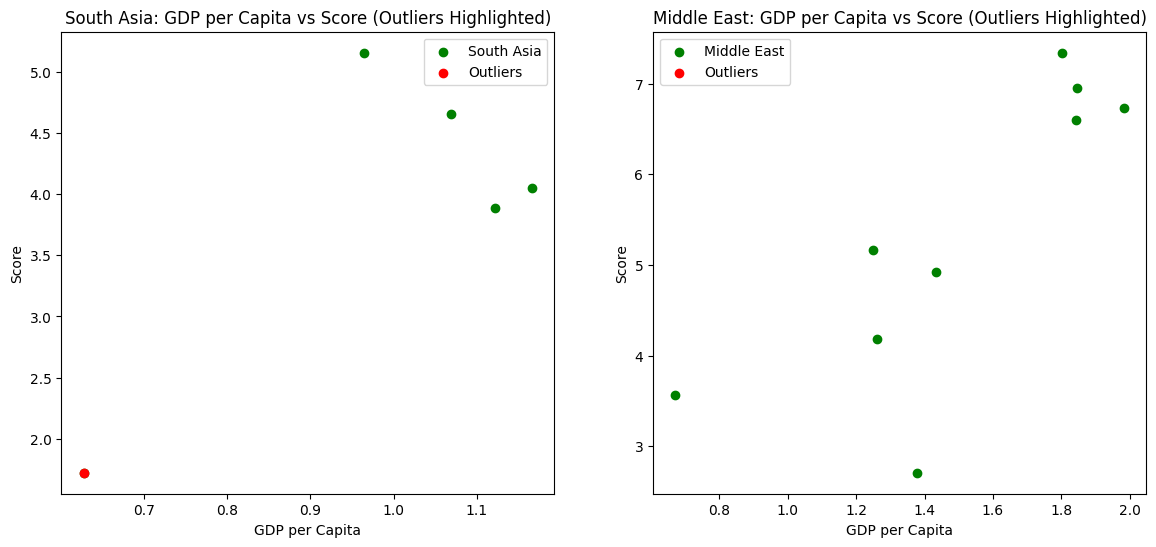

South Asia Outliers - Score:
  Country name  score
4  Afghanistan  1.721

South Asia Outliers - GDP per Capita:
  Country name  Log GDP per capita
4  Afghanistan               0.628

Middle East Outliers - Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East Outliers - GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


In [36]:
def outliers_detection(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3-Q1
  lower_b = Q1 - 1.5*IQR
  upper_b = Q3 + 1.5*IQR
  return data[(data[column]<lower_b) | (data[column]>upper_b)]
south_outliers_score = outliers_detection(seperate_df,'score')
south_outliers_GDP = outliers_detection(seperate_df,'Log GDP per capita')

middle_outliers_score = outliers_detection(middle_east_df,'score')
middle_outliers_GDP = outliers_detection(middle_east_df,'Log GDP per capita')

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(seperate_df['Log GDP per capita'],seperate_df['score'], color = 'green',label = 'South Asia')
plt.scatter(south_outliers_GDP['Log GDP per capita'], south_outliers_score['score'], color='red', label='Outliers')
plt.title("South Asia: GDP per Capita vs Score (Outliers Highlighted)")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], color='green', label='Middle East')
plt.scatter(middle_outliers_GDP['Log GDP per capita'], middle_outliers_score['score'], color='red', label='Outliers')
plt.title("Middle East: GDP per Capita vs Score (Outliers Highlighted)")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.legend()

plt.show()

print("South Asia Outliers - Score:")
print(south_outliers_score[['Country name', 'score']])
print("\nSouth Asia Outliers - GDP per Capita:")
print(south_outliers_GDP[['Country name', 'Log GDP per capita']])

print("\nMiddle East Outliers - Score:")
print(middle_outliers_score[['Country name', 'score']])
print("\nMiddle East Outliers - GDP per Capita:")
print(middle_outliers_GDP[['Country name', 'Log GDP per capita']])

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-41-22e1926ca685>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data_df['Region'] = 'South Asia'
<ipython-input-41-22e1926ca685>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data_df['Region'] = 'Middle East'


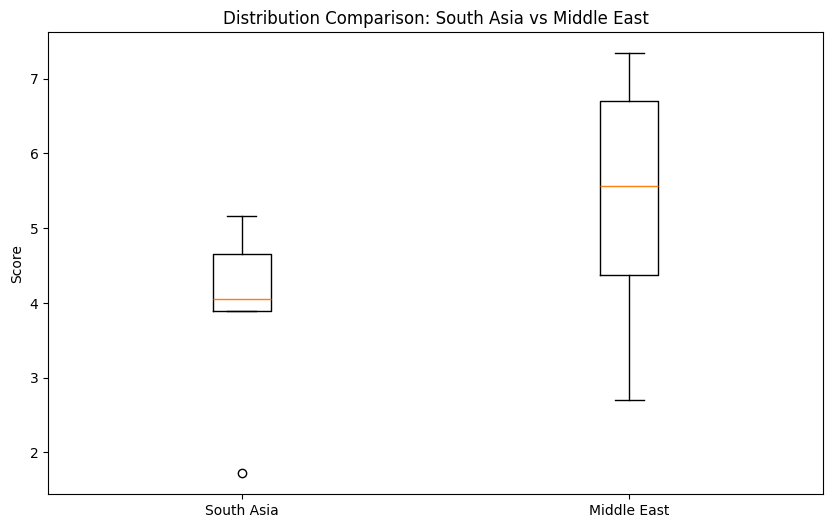

In [41]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asia_data_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_data_df = df[df['Country name'].isin(middle_east_countries)]
south_asia_data_df['Region'] = 'South Asia'
middle_east_data_df['Region'] = 'Middle East'
combined_data = pd.concat([south_asia_data_df, middle_east_data_df])
plt.figure(figsize=(10, 6))
plt.boxplot([combined_data[combined_data['Region'] == 'South Asia']['score'], combined_data[combined_data['Region'] == 'Middle East']['score']], labels=['South Asia', 'Middle East'])
plt.ylabel('Score')
plt.title('Distribution Comparison: South Asia vs Middle East')
plt.show()
